# Digital Scotch Sommelier Capstone

In [1]:
# Imports
from __future__ import print_function

import pandas as pd
import re
import numpy as np
import seaborn as sns
import decimal
import ipywidgets as widgets
import matplotlib.pyplot as plt
import nltk

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from bs4 import BeautifulSoup

from nltk.tokenize import word_tokenize, regexp_tokenize
from nltk.corpus import stopwords

from ipywidgets import interact, interactive, fixed, interact_manual
from ipywidgets import widgets, interact, interact_manual, fixed
from IPython.display import display, clear_output, HTML, Javascript

sns.set()
pd.options.mode.chained_assignment = None
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', None)
%matplotlib inline

# Raw Input Questions

---
## - What is your price range? 


| Below 50 | 50 to 100 | 100 to 150 | 150 to 200 | 200 to 500 | Above 500 |
|:--------:|:---------:|:----------:|:----------:|:----------:|:---------:|

---

In [2]:
def price_range_f(price_range):
    return price_range

In [3]:
price_range = interactive(
    price_range_f,
    price_range=[
        'Below 50', '50 to 100', '100 to 150', '150 to 200', '200 to 500', 'Above 500'
    ])

---
## - What category would you prefer?


| Blended Scotch | Single Malt Scotch | Single Grain Scotch |
|:--------------:|:------------------:|:-------------------:|

---

In [4]:
def category_f(type_range):
    return type_range

In [5]:
type_range = interactive(
    category_f,
    type_range=[
        'Blended Scotch', 'Single Malt Scotch', 'Single Grain Scotch'
    ])


---
## - What ABV level would you prefer?

| Below 40% | 40% | Above 40% |
|:---------:|:---:|:---------:|

---


In [6]:
def abv_range_f(abv_range):
    return abv_range

In [7]:
abv_range = interactive(
    abv_range_f, abv_range=['40%', 'Below 40%', 'Above 40%'])


---
## - What tasting notes do you prefer?

| taste | taste  | taste | taste    | taste  | taste     |
|:-----:|:------:|:-----:|:--------:|:------:|:---------:|
| earth | fruit  | honey | cream    | malt   | herbal    |
| wood  | floral | nutty | ginger   | citrus | vanilla   |
| spicy | peaty  | dry   | toffee   | pepper | caramel   |
| malt  | silk   | syrup | toast    | oil    | chocolate |
| wine  | cereal | salty | cinnamon | sweet  |           |

---
---

In [8]:
def taste_notes1(flavor_1):
    return flavor_1

In [9]:
def taste_notes2(flavor_2):
    return flavor_2

In [10]:
def taste_notes3(flavor_3):
    return flavor_3

In [11]:
flavor_1 = interactive(
    taste_notes1,
    flavor_1=[
        '', 'earth', 'wood', 'spice', 'malt', 'wine', 'fruit', 'floral', 'peat',
        'silk', 'cereal', 'honey', 'nut', 'dry', 'syrup', 'salt', 'cream',
        'ginger', 'toffee', 'toast', 'cinnamon', 'malt', 'citrus', 'pepper',
        'oil', 'sweet', 'herbal', 'vanilla', 'caramel', 'chocolate'
    ])

In [12]:
flavor_2 = interactive(
    taste_notes2,
    flavor_2=[
        '', 'earth', 'wood', 'spice', 'malt', 'wine', 'fruit', 'floral', 'peat',
        'silk', 'cereal', 'honey', 'nut', 'dry', 'syrup', 'salt', 'cream',
        'ginger', 'toffee', 'toast', 'cinnamon', 'malt', 'citrus', 'pepper',
        'oil', 'sweet', 'herbal', 'vanilla', 'caramel', 'chocolate'
    ])

In [13]:
flavor_3 = interactive(
    taste_notes3,
    flavor_3=[
        '', 'earth', 'wood', 'spice', 'malt', 'wine', 'fruit', 'floral', 'peat',
        'silk', 'cereal', 'honey', 'nut', 'dry', 'syrup', 'salt', 'cream',
        'ginger', 'toffee', 'toast', 'cinnamon', 'malt', 'citrus', 'pepper',
        'oil', 'sweet', 'herbal', 'vanilla', 'caramel', 'chocolate'
    ])

In [14]:
# Reading in the scotch reviews data received from Kaggle
scotch = pd.read_csv('./dataset/scotch_review.csv')

In [15]:
scotch['category'] = pd.DataFrame(scotch['category']).replace(
    {
        'Blended Malt Scotch Whisky': 'Blended Scotch',
        'Blended Scotch Whisky': 'Blended Scotch',
        'Grain Scotch Whisky': 'Single Grain Scotch',
        'Single Grain Whisky': 'Single Grain Scotch'
    })

In [16]:
scotch.shape

(2247, 7)

In [17]:
# scotch['price']

In [18]:
scotch['price'] = scotch['price'].map(lambda x: ''.join(str(x).split(',')))

In [19]:
# Dropping Unnamed: 0 due to being unneeded
# and currency due to all are in USD
scotch.drop(['Unnamed: 0', 'currency'], axis=1, inplace=True)

In [20]:
# Verify correct columns have dropped
# scotch.head()

In [21]:
# Renaming column for simplicity
scotch.rename(index=str, columns={'review.point': 'points'}, inplace=True)

In [22]:
# Seeing the dtypes of each column
# scotch.info()

In [23]:
# Sorting the price
# sorted(scotch.price)

In [24]:
# Extracting and just the numbers from the price
scotch['price'] = scotch['price'].str.extract('(\d\d\d*|\d)')
# scotch['price']

In [25]:
# Changing all strings to floats
scotch['price'] = scotch['price'].astype(str).astype(float)

In [26]:
# scotch.dtypes

In [27]:
# scotch.shape

In [28]:
# Finding all the scotches that have an abv associated
# and breaking them into a new column

scotch['abv'] = scotch['name'].str.extract('(\d\d%|\d\d.\d%)')

# print('%.1f%% of the scotches have an abv associated with them.' %((1-(scotch['abv'].isnull().sum()/len(scotch['abv'])))*100))

In [29]:
# Since there are so few nan I will just drop them
scotch['abv'].dropna(inplace=True)

In [30]:
# Because abv was with the name column before, it was a string
# Converted it to a float
scotch['abv'] = scotch['abv'].astype(str).str[:-1].astype(float)

In [31]:
# Finding the nan
# scotch['abv'].isnull().sum()

In [32]:
# Dropping the nan
scotch['abv'].dropna(inplace=True)

In [33]:
# Verifying nan drop
# scotch['abv'].isnull().sum()

In [34]:
# Another verification for fun
# print('%.1f%% of the scotches have an abv associated with them.' %((1-(scotch['abv'].isnull().sum()/len(scotch['abv'])))*100))

In [35]:
# scotch.head()

In [36]:
# Separating prices into 6 understandable bins
bins_price = [0, 50, 100, 150, 200, 500, np.inf]
price = [
    'Below 50', '50 to 100', '100 to 150', '150 to 200', '200 to 500',
    'Above 500'
]

scotch['price_categories'] = pd.cut(scotch['price'], bins_price, labels=price)

In [37]:
# Separating abv into 3 understandable bins
bins_abv = [0, 39, 40, np.inf]
abv = ['Below 40%', '40%', 'Above 40%']

scotch['abv_categories'] = pd.cut(scotch['abv'], bins_abv, labels=abv)

In [38]:
# scotch.shape

In [39]:
scotch.drop_duplicates(keep='first', inplace=True)

# Natural Language Processing and Random Forest

In [40]:
# Creating the corpus
text_corpus = scotch['description']

## CountVectorizer

In [41]:
vect = CountVectorizer(stop_words="english")

# Fit the vectorizer on our corpus # Transform the corpus
X_text = vect.fit_transform(text_corpus)

cv_scotch = pd.DataFrame(X_text.toarray(), columns=vect.get_feature_names())
# cv_scotch

In [42]:
# cv_scotch.iloc[0].sort_values(0, ascending=False)

In [43]:
cv_scotch.index = scotch['category']
# cv_scotch.head()
# cv_scotch.shape

### CountVectorizer Bar Graphs

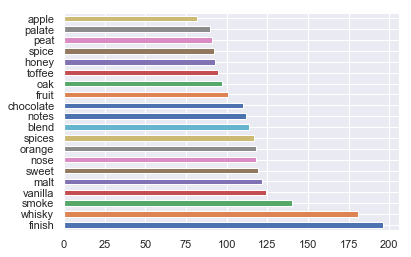

In [44]:
cv_scotch.loc['Blended Scotch'].sum().sort_values(ascending=False).head(20).plot(kind='barh');

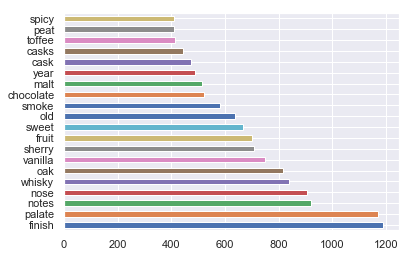

In [45]:
cv_scotch.loc['Single Malt Scotch'].sum().sort_values(ascending=False).head(20).plot(kind='barh');

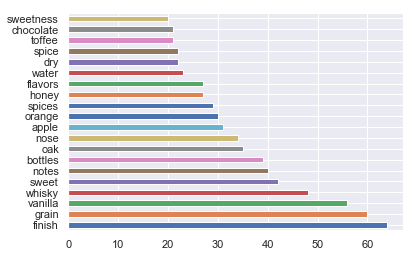

In [46]:
cv_scotch.loc['Single Grain Scotch'].sum().sort_values(ascending=False).head(20).plot(kind='barh');

## Term Frequency–Inverse Document Frequency (TFIDF)

In [47]:
tfidf_vect = TfidfVectorizer(stop_words='english')
tfidf_X_text = vect.fit_transform(text_corpus)
tfidf_scotch = pd.DataFrame(X_text.toarray(), columns=vect.get_feature_names())

In [48]:
tfidf_scotch.head()

,00,000,002,011,060,076,08,080,090,10,...,zigzag,zinfandel,zing,zinginess,zinging,zings,zingy,zippy,zone,ìle
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
tfidf_scotch.index = scotch['category']

In [50]:
# cv_scotch.shape

### TFIDF Bar Graphs

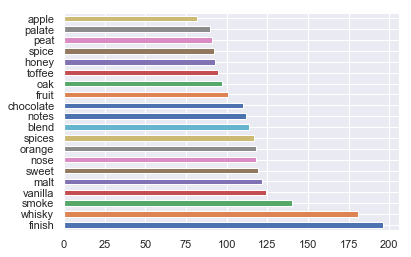

In [51]:
tfidf_scotch.loc['Blended Scotch'].sum().sort_values(ascending=False).head(20).plot(kind='barh');

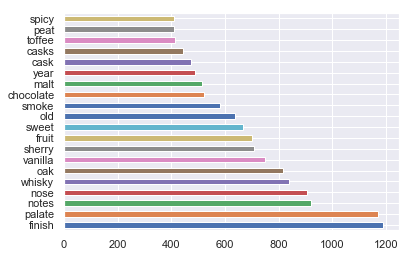

In [52]:
tfidf_scotch.loc['Single Malt Scotch'].sum().sort_values(ascending=False).head(20).plot(kind='barh');

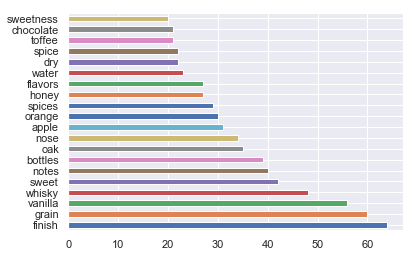

In [53]:
tfidf_scotch.loc['Single Grain Scotch'].sum().sort_values(ascending=False).head(20).plot(kind='barh');

In [54]:
# Instantiates the RFC.
# rf = RandomForestClassifier(verbose=2, n_jobs=-1) 
# Fit the model on your training data.
# rf.fit(cv_scotch, tfidf_scotch) 
## And score it on your testing data.
# rf.score(X_test, y_test)

In [55]:
cv_scotch.shape

(2245, 8818)

In [56]:
tfidf_scotch.shape

(2245, 8818)

In [57]:
tfidf_vect = TfidfVectorizer(sublinear_tf=True, 
                        min_df=5, 
                        norm='l2', 
                        encoding='latin-1', 
                        ngram_range=(1, 2), 
                        stop_words='english')
features = tfidf_vect.fit_transform(text_corpus).toarray()
features.shape

tfidf_vect = TfidfVectorizer(stop_words='english')
tfidf_X_text = vect.fit_transform(text_corpus)
tfidf_scotch = pd.DataFrame(X_text.toarray(), columns=vect.get_feature_names())

---


In [58]:
X = scotch['description']
y = scotch['points']
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.75,
                                                    random_state=42)

In [59]:
X.head()

0    Magnificently powerful and intense. Caramels, dried peats, elegant cigar smoke, seeds scraped from vanilla beans, brand new pencils, peppercorn, coriander seeds, and star anise make for a deeply satisfying nosing experience. Silky caramels, bountiful fruits of ripe peach, stewed apple, orange pith, and pervasive smoke with elements of burnt tobacco. An abiding finish of smoke, dry spices, and banoffee pie sweetness. Close to perfection. Editor's Choice                                                                        
1    What impresses me most is how this whisky evolves; it's incredibly complex. On the nose and palate, this is a thick, viscous, whisky with notes of sticky toffee, earthy oak, fig cake, roasted nuts, fallen fruit, pancake batter, black cherry, ripe peach, dark chocolate-covered espresso bean, polished leather, tobacco, a hint of wild game, and lingering, leafy damp kiln smoke. Flavors continue on the palate long after swallowing. This is what we all hope for 

In [60]:
y.head()

0    97
1    97
2    97
3    96
4    96
Name: points, dtype: int64

In [61]:
X_train.shape

(561,)

In [62]:
y_train.shape

(561,)

In [63]:
X_test.shape

(1684,)

In [64]:
y_test.shape

(1684,)

In [65]:
ini_bs = BeautifulSoup(X_train[0])

In [66]:
print(X_train[0])
print(ini_bs.get_text())

This is finished for 8 months in tawny port pipes and is quite restrained on the early nose, opening up to reveal rose petals, milk chocolate, and double cream.  The palate is floral, with raisins  and red currants. Drying in the  finish, with peppery oak and  cinnamon.
This is finished for 8 months in tawny port pipes and is quite restrained on the early nose, opening up to reveal rose petals, milk chocolate, and double cream.  The palate is floral, with raisins  and red currants. Drying in the  finish, with peppery oak and  cinnamon.


In [67]:
# Use regular expressions to do a find-and-replace
letters_only = re.sub("[^a-zA-Z]",           # The pattern to search for
                      " ",                  
                      ini_bs.get_text() )    # The text to search

In [68]:
lower_case = letters_only.lower()
words = lower_case.split()

In [69]:
print(lower_case)
print(words)

this is finished for   months in tawny port pipes and is quite restrained on the early nose  opening up to reveal rose petals  milk chocolate  and double cream   the palate is floral  with raisins  and red currants  drying in the  finish  with peppery oak and  cinnamon 
['this', 'is', 'finished', 'for', 'months', 'in', 'tawny', 'port', 'pipes', 'and', 'is', 'quite', 'restrained', 'on', 'the', 'early', 'nose', 'opening', 'up', 'to', 'reveal', 'rose', 'petals', 'milk', 'chocolate', 'and', 'double', 'cream', 'the', 'palate', 'is', 'floral', 'with', 'raisins', 'and', 'red', 'currants', 'drying', 'in', 'the', 'finish', 'with', 'peppery', 'oak', 'and', 'cinnamon']


In [70]:
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [71]:
words = [w for w in words if not w in stopwords.words("english")]

In [72]:
print(words)

['finished', 'months', 'tawny', 'port', 'pipes', 'quite', 'restrained', 'early', 'nose', 'opening', 'reveal', 'rose', 'petals', 'milk', 'chocolate', 'double', 'cream', 'palate', 'floral', 'raisins', 'red', 'currants', 'drying', 'finish', 'peppery', 'oak', 'cinnamon']


In [73]:
def title_to_words(raw_title):
    # Function to convert a raw review to a string of words
    # The input is a single string (a raw movie review), and 
    # the output is a single string (a preprocessed movie review)
    # 1. Remove HTML
    title_text = BeautifulSoup(raw_title).get_text()
    #
    # 2. Remove non-letters        
    letters_only = re.sub("[^a-zA-Z]", " ", title_text)
    link = re.sub('(^https?:\/\/.*[\r\n]*)[\W]', '', title_text, flags=re.MULTILINE)
    #
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()
    #
    # 4. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stops = set(stopwords.words('english'))
    # 
    # 5. Remove stop words
    meaningful_words = [w for w in words if not w in stops]
    #
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    return(" ".join(meaningful_words))

In [74]:
# Get the number of reviews based on the dataframe size.
total_title = X_train.shape[0]
print(total_title)

# Initialize an empty list to hold the clean reviews.
clean_train_title = []
clean_test_title = []

561


In [75]:
print("Cleaning and parsing the description set of scotch data...")

j = 0
for _ in X_train:
    # Convert review to words, then append to clean_train_reviews.
    clean_train_title.append(title_to_words(_))
    
    # If the index is divisible by 1000, print a message
    if (j+1) % 1000 == 0:
        print(f'Title {j+1} of {total_title}.')
    
    j += 1

# Let's do the same for our testing set.

print("Cleaning and parsing the testing set movie reviews...")

for _ in X_test:
    # Convert review to words, then append to clean_train_reviews.
    clean_test_title.append(title_to_words(_))
    
    # If the index is divisible by 1000, print a message
    if (j+1) % 1000 == 0:
        print(f'Title {j+1} of {total_title}.')
        
    j += 1

Cleaning and parsing the description set of scotch data...
Cleaning and parsing the testing set movie reviews...
Title 1000 of 561.
Title 2000 of 561.


In [76]:
vectorizer = CountVectorizer(max_features = 5000) 

In [77]:
# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.

train_data_features = vectorizer.fit_transform(clean_train_title)

test_data_features = vectorizer.transform(clean_test_title)

# Numpy arrays are easy to work with, so convert the result to an 
# array
train_data_features = train_data_features.toarray()

In [78]:
print(train_data_features.shape)

(561, 4361)


In [79]:
print(test_data_features.shape)

(1684, 4361)


In [80]:
train_data_features[0:6]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [81]:
vocab = vectorizer.get_feature_names()
print(vocab)

['abdomen', 'aberdeen', 'aberdeenshire', 'able', 'abounds', 'absent', 'absorbed', 'absorbing', 'abv', 'accelerated', 'accent', 'accented', 'accents', 'accentuated', 'accentuates', 'accentuating', 'acceptable', 'accommodates', 'accompanied', 'accompanies', 'accomplished', 'according', 'accustomed', 'ace', 'acetone', 'achieved', 'acidic', 'acidity', 'acquired', 'acrid', 'across', 'act', 'action', 'active', 'activity', 'acts', 'actually', 'add', 'added', 'adding', 'addition', 'additional', 'adds', 'adela', 'adelphi', 'adhesives', 'admirable', 'adopts', 'adore', 'adorns', 'advancement', 'advantage', 'adventure', 'adventurous', 'aerosol', 'affable', 'affair', 'affected', 'afford', 'aficionado', 'african', 'aftermath', 'afternoon', 'agave', 'age', 'aged', 'ages', 'aggressive', 'aggressively', 'aging', 'ago', 'agricole', 'aim', 'aims', 'air', 'akin', 'alasdair', 'albeit', 'alcohol', 'alcohols', 'aldehydes', 'alexander', 'allocation', 'allow', 'allowing', 'allows', 'allspice', 'allt', 'allure'

In [82]:
parameters = {}

rfr = RandomForestRegressor(random_state=42)

gs_rfr = GridSearchCV(rfr, 
                      param_grid=parameters, 
                      verbose=2, 
                      n_jobs=-1, 
                      return_train_score=True                     
                     )

train_data_features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [83]:
rfr.fit(train_data_features, y_train)
print(rfr.score(train_data_features, y_train))
print(rfr.score(test_data_features, y_test))

/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.856762713905847
0.09225444461242638


In [84]:
gs_rfr.fit(train_data_features, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    4.1s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1, param_grid={},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=2)

In [85]:
gs_rfr.best_score_

0.09000484523384875

In [86]:
gs_rfr.best_params_

{}

In [87]:
gs_rfr.cv_results_

{'mean_fit_time': array([1.35752026]),
 'std_fit_time': array([0.07083451]),
 'mean_score_time': array([0.00873804]),
 'std_score_time': array([0.00493276]),
 'params': [{}],
 'split0_test_score': array([0.03602243]),
 'split1_test_score': array([0.15731012]),
 'split2_test_score': array([0.07668198]),
 'mean_test_score': array([0.09000485]),
 'std_test_score': array([0.0504037]),
 'rank_test_score': array([1], dtype=int32),
 'split0_train_score': array([0.83509621]),
 'split1_train_score': array([0.81764966]),
 'split2_train_score': array([0.86785351]),
 'mean_train_score': array([0.84019979]),
 'std_train_score': array([0.02081092])}

In [88]:
gs_rfr.error_score

'raise-deprecating'

In [89]:
gs_rfr.fit(test_data_features, y_test)

/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.4s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1, param_grid={},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=2)

In [90]:
gs_rfr.best_score_

0.12215637790719341

In [91]:
gs_rfr.best_params_

{}

In [92]:
gs_rfr.cv_results_

{'mean_fit_time': array([1.4755923]),
 'std_fit_time': array([0.1549944]),
 'mean_score_time': array([0.00387526]),
 'std_score_time': array([0.00069546]),
 'params': [{}],
 'split0_test_score': array([0.10890504]),
 'split1_test_score': array([0.11708322]),
 'split2_test_score': array([0.1405045]),
 'mean_test_score': array([0.12215638]),
 'std_test_score': array([0.01339131]),
 'rank_test_score': array([1], dtype=int32),
 'split0_train_score': array([0.854187]),
 'split1_train_score': array([0.84998886]),
 'split2_train_score': array([0.8337192]),
 'mean_train_score': array([0.84596502]),
 'std_train_score': array([0.00882709])}

# Preference Selection

In [93]:
# Select each other categories
display(price_range)
display(type_range)
display(abv_range)
display(flavor_1)
display(flavor_2)
display(flavor_3)

price_range_drop = price_range.result
category_range_drop = type_range.result
abv_range_drop = abv_range.result
first_taste_drop1 = flavor_1.result
second_taste_drop2 = flavor_2.result
third_taste_drop3 = flavor_3.result

# # Should change with every change of a drop down
# print(price_range_drop)
# print(category_range_drop)
# print(abv_range_drop)
# print(first_taste_drop1)
# print(second_taste_drop2)
# print(third_taste_drop3)

# These should be the inputs your scotch preferances so they
# can be made into a dataframe
scotch_pref = pd.DataFrame({
    'price_range_drop': [price_range_drop],
    'category_range_drop': [category_range_drop],
    'abv_range_drop': [abv_range_drop],
    'first_taste_drop1': [first_taste_drop1],
    'second_taste_drop2': [second_taste_drop2],
    'third_taste_drop3': [third_taste_drop3]
},
                           index=[0]).T
# scotch_pref

price_pref = scotch.loc[scotch['price_categories'] == price_range_drop]

category_pref = scotch.loc[scotch['category'] == category_range_drop]

abv_pref = scotch.loc[scotch['abv_categories'] == abv_range_drop]

# price_pref.head()

# category_pref.head()

# abv_pref.head()

abv_price_pref = price_pref.merge(abv_pref, how='inner', on=['name'])

abv_price_cat_pref = abv_price_pref.merge(
    category_pref, how='inner', on=['name'])

# abv_price_cat_pref.head()

basic_pref = abv_price_cat_pref[[
    'name', 'category', 'points', 'price', 'abv', 'description'
]]

# basic_pref.shape

# len(basic_pref)

def run_all(ev):
    display(Javascript('IPython.notebook.execute_cells_below()'))

button = widgets.Button(description="Recommend")
button.on_click(run_all)
display(button)

interactive(children=(Dropdown(description='price_range', options=('Below 50', '50 to 100', '100 to 150', '150…

interactive(children=(Dropdown(description='type_range', options=('Blended Scotch', 'Single Malt Scotch', 'Sin…

interactive(children=(Dropdown(description='abv_range', options=('40%', 'Below 40%', 'Above 40%'), value='40%'…

interactive(children=(Dropdown(description='flavor_1', options=('', 'earth', 'wood', 'spice', 'malt', 'wine', …

interactive(children=(Dropdown(description='flavor_2', options=('', 'earth', 'wood', 'spice', 'malt', 'wine', …

interactive(children=(Dropdown(description='flavor_3', options=('', 'earth', 'wood', 'spice', 'malt', 'wine', …

Button(description='Recommend', style=ButtonStyle())

# Recommendations

In [94]:
recommendation = []

try:
    for _ in range(0, len(basic_pref)):
        result = {}
        if first_taste_drop1 in basic_pref['description'][
                _] and second_taste_drop2 in basic_pref['description'][
                    _] and third_taste_drop3 in basic_pref['description'][_]:
            result['final_rec'] = basic_pref.iloc[[_]]
            pass
            if first_taste_drop1 in basic_pref['description'][
                    _] and second_taste_drop2 in basic_pref['description'][_]:
                result['final_rec'] = basic_pref.iloc[[_]]
                pass
                if first_taste_drop1 in basic_pref['description'][
                        _] and third_taste_drop3 in basic_pref['description'][
                            _]:
                    result['final_rec'] = basic_pref.iloc[[_]]
                    pass
                    if second_taste_drop2 in basic_pref['description'][
                            _] and third_taste_drop3 in basic_pref[
                                'description'][_]:
                        result['final_rec'] = basic_pref.iloc[[_]]
                        pass
                        if first_taste_drop1 in basic_pref['description'][
                                _] or second_taste_drop2 in basic_pref[
                                    'description'][
                                        _] or third_taste_drop3 in basic_pref[
                                            'description'][_]:
                            result['final_rec'] = basic_pref.iloc[[_]]
                            recommendation.append(result['final_rec'])
                            pass
    recommendation = pd.concat(recommendation)

except ValueError:
    print('Sorry, there were no recommendations matching your preferences.')

print('Showing {} recommendations!'.format(recommendation.shape[0]))

recommendation


Showing 79 recommendations!


,name,category,points,price,abv,description
0,"Johnnie Walker Double Black, 40%",Blended Scotch,90,40.0,40.0,"So how brave can you be? Would you take one of the world's most iconic blends and risk messing with it? If you've got a whisky maker as good as Jim Beveridge, then why not? This picks up from the regular JW Black and its signature Caol Ila smoke and peat heart and then adds to it, doing exactly what it says on the tin. But the clever part of this is upping the apple, orange, and fruit content too. Great."
1,"Dewar’s 15 year old The Monarch, 40%",Blended Scotch,90,50.0,40.0,"The divine stone fruit aromas are the key to unlocking the nose on this one: apricot, honey, vanilla icing, malt bins, Quaker Oats Squares, and lofty floral top notes. Sweet mandarin, brown sugar, vanilla fudge, strands of finely shredded peel, and more spice than the 12 year old can muster. The sweet vanilla aftertaste is softer and more elegant than the younger expressions."
2,"Shackleton, 40%",Blended Scotch,90,35.0,40.0,"One hundred ten years after the Nimrod expedition, blender Richard Paterson’s adventurous marriage of over 20 Highland malts brings fresh green fruits, manuka honey, vanilla, banana muffin, cantaloupe, fresh herbs, spice, and a wisp of smoke. Refreshing palate of green melon, light honey, vanilla, cinnamon, cooked apple, and gooseberry, becoming sour. More complexity on the finish: spice, smoke, cooked fruits, and chalky Sweethearts candies. Pair with mature prosciutto."
3,"Johnnie Walker Blenders’ Batch Sherry Cask Finish 12 year old, 40%",Blended Scotch,89,44.0,40.0,"Blender Aimée Gibson’s experimental batch 7 is designed as a sherry finished Black Label. Beautifully smoky, with dried fruits, charred oak, wood spices, vanilla, cocoa, and bonfire smoke. Toffee flavors, with thick smoke, red fruits, orange, raisin, oak spice, gingerbread, marshmallow, strawberry jam, and dark marmalade. Dry finish with bitter peels, dark chocolate, and some feisty spices. In comparison, regular Black Label is silkier, more integrated, and more peppery. (Global Travel Retail only)"
4,"Dewar’s 12 year old The Ancestor, 40%",Blended Scotch,89,33.0,40.0,"A straightforward proposition of honey, vanilla sponge cake, barley notes, hints of apple, fresh banana, melon, and bundles of dry straw. It’s a sweetheart: soft vanilla fudge, heather honey, banana-topped banoffee pie, fudge, vanilla sandwich cookies, barley sugar, and lemon peel, with hardly any spice in the early phase. The finish has a snag of pepper at the end, but this is gorgeously tasty, with smooth vanilla fudge all the way."
5,"Cutty Sark Storm, 40%",Blended Scotch,89,31.0,40.0,"Cutty Sark master blender Kirsteen Campbell has hit the ground running and is playing a leading role in the revival of this iconic blend. Storm is a very different whisky than Tam o' Shanter. The nose is nuanced and light, with orange jelly and citrus juice; the palate is sophisticated, fruity, perfectly balanced, rounded, and gentle, with a high-percentage malt content evident in the mix. The finish is quite short but very more-ish. An amazing whisky for the price. £20 VALUE PICK"
6,"The Naked Grouse, 40%",Blended Scotch,89,35.0,40.0,"This is the latest spinoff from core blend The Famous Grouse, so there’s Macallan and Highland Park in here, and from the taste of it, in sizeable quantities. With smart but minimalist packaging and an environmental theme, this is a very ‘now’ whisky. It’s heavily sherried, very rich, and sweet, but there’s enough spice to stop it becoming cloying, and it’s as soft as a down feather blanket on the palate. You can easily drink it straight, too."
7,"Johnnie Walker The Spice Road, 40%",Blended Scotch,88,43.0,40.0,"Somebody at Diageo has been taking a lot of interest in the Johnnie Walker range of late, what with the revamp of the core range and now a regular stream of special releases. This is the first of a series for Travel Retail only, but it takes the Johnnie Walker themes — vanilla

In [95]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script><a href="javascript:code_toggle()">Hide</a> code.''')